# Tutorial python

ここでは画像処理におけるnumpyの基本的な使い方をいくつか紹介していきます。

**numpy**とはpyhtonで用意されたパッケージ(Cでいうライブラリのようなもの)の一種で、行列演算などを得意としています。

また、画像処理では**OpenCV**というライブラリがあり、様々な処理をAPIかしています。

この問題では、numpyをいじって、OpenCVの処理を自分の手で実現することを目標としています。

# 画像処理の基本

PCやスマホ上で画像は数値の配列（行列）として存在している。

見た目はモノや風景に見えるが、その実態は数値が行と列とチャンネルの3方向に並んだ数値の集合だ。1マスをピクセル(pixel)や画素と呼ぶ。

<img src="images/img_basic1.png" width=500>

画像の色の表現にはRGB(Red, Green, Blue)の3つの組み合わせが使われている。RGBは行と列とは別方向に並んだ軸であり、基本的にはRGBがチャンネル方向で表現される

この数値は 0から255の256の数値で大小が表現され、値が大きいほどその色味が強い。たとえば (R, G, B) = (255, 10, 100)であれば、赤味が最も強く、緑味が最も弱い色になる。RGBをそれぞれ0から255に変化させた色合いが下図となる。

<img src="images/img_basic2.png" width=800>

画像処理では、ピクセルの値を操作する処理である。この時の操作とは、たとえば、隣り合っているピクセルの差分をとったりして、輪郭をとったりすることを示す。

<img src="images/img_basic3.png" width=400>


# 環境設定
Python3でやって下さい。(解答はPython-3で検証）

## Google Colabの人は

これで必要ライブラリが入ります。

```
!pip install numpy matplotlib opencv-python sklearn
```

## 自分のPCで動かす人は

## 1. Minicondaのインストール

https://conda.io/miniconda.html のサイトからMinicondaをインストールします。これはWindowでもMacOSでも可能です。Minicondaがインストールできたら、端末(Windowでは端末、MacOSではターミナル)を開き、以下コマンドで仮想環境を作成します。

```bash
$ conda create python=3.6 -n gasyori100
```

作成できたら、以下コマンドで仮想環境を動作します。

```bash
$ conda activate gasyori100
```

するとこうなります。

```bash
(gasyori100) :~/work_space/Gasyori100knock/ :$ 
```

## 2. パッケージのインストール

以下のコマンドで必要なパッケージをインストールします。

```bash
$ pip install numpy matplotlib opencv-python sklearn
```

## 画像処理チュートリアル

以下、jupyterでの実行で進めます。（pythonファイルに保存して実行、コマンドプロンプト上で実行でも大丈夫です）

下のコードを実行します

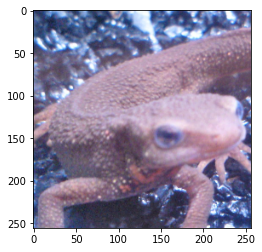

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img)
plt.show()

これで変数imgに画像情報がnumpy形式で保存されます。

画像のサイズ情報をとるにはimg.shapeを使います。
これは(高さ、横、チャネル)の順になっていて、つまり 縦256ピクセル、横256ピクセル、3チャネル(青、緑、赤)を意味します。

In [2]:
img.shape

(256, 256, 3)

型をとるには、img.dtypeを使用します。

uint8とは符号なしintで8ビットを意味します。画像はRGB成分がそれぞれ通常0から255の256段階で表現されます。

例えば、赤のピクセルは(R,G,B) = (255, 0, 0)、白は(R,G,B) = (255, 255, 255)です。

画像にする時は必ずこの型にしないと画像がおかしくなってしまいます。（あとで説明します。）


In [3]:
img.dtype

dtype('uint8')

画像の操作法はnumpyとほとんど同じです。

例えば、x=30、y=20の画素値をいじりたい時は、こうします。
画素値はRGBの順に並んでいます。array()とはnumpy形式になっていることを意味します。つまり、OpenCVはnumpyのラッパーです。

In [4]:
img[20, 30]

array([ 58,  75, 121], dtype=uint8)

さらに、x=30、y=20、のR成分をとる時はこうします。

In [5]:
img[20, 30, 0]

58

numpyには**スライス**という機能があります。
これはある値v1からある値v2までの全ての要素にアクセスできることを意味します。

例えば、y=20, x=[30, 32]までを見る時はこうします。

30:33とすれば行列のまま取り出せます。a:bとすることで、a<= v < bの値にアクセスできます。

ちなみに :30とすれば [0, 30]、30:とすれば[30, 最後]までを取り出せます。

In [6]:
img[20, 30:33]

array([[ 58,  75, 121],
       [ 43,  70, 113],
       [ 47,  72, 103]], dtype=uint8)

例えば画像の左上(x=[0, 50], y = [0, 50])を黒にするには、こんな感じでできます。

画像のコピーはcopy()を使います。これを使わずに img2 = img としてしまうと、アドレスが渡されるので、img2に対する変更がimgにも起こってしまいます。

画像の複数表示は plt.subplots()を使います。（他にも方法はあるので、気になった場合はググってください。）

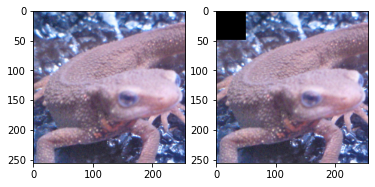

In [7]:
img2 = img.copy()
img2[:50, :50] = 0

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img2)
plt.show()

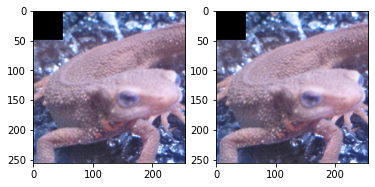

In [8]:
# NG
img2 = img
img2[:50, :50] = 0

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img2)
plt.show()

次に先程の　4. **画素が0未満のものは0, 255を超えたものは255に直す。**　に関して説明します。

例えば、画像を一度 float32型にして、一部分のR成分を260という値に変えてみます。

uint8型は[0, 255] の範囲しか取り得ないので、これをuint8型に直すとこんな風になります。イモリの顔の一部分が青くなってしまっています。

**これは、260をuint8型に直すと260 - 256 が起きて、4になってしまうためです。**

これが原因で画素値がおかしくなることが多々起きてしまいます。なので、4の操作が必要となります。

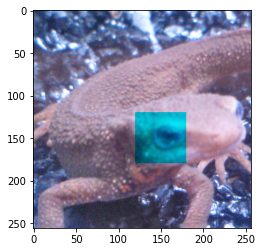

In [8]:
img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

img[120:180, 120:180, 0] = 260
plt.imshow(img)
plt.show()

In [9]:
img2[120, 120]

array([195, 179, 205], dtype=uint8)

しかも、int型なので、整数値の計算しかできません。

なので、実際にコーディングする時では、いったん np.float32型にしてから、uint8にしましょう。

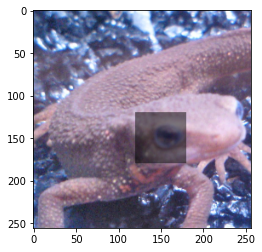

In [10]:
img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

img = img.astype(np.float32)

img[120:180, 120:180] *= 0.5

img = img.astype(np.uint8)

plt.imshow(img)
plt.show()

# 練習問題

画像の左半分上のRとBを入れ替えて表示してみましょう。

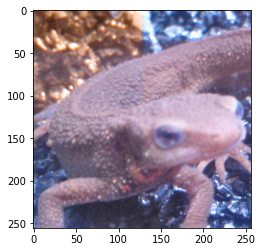

In [11]:
img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

h, w, c = img.shape

img[:h//2, :w//2] = img[:h//2, :w//2, ::-1]

plt.imshow(img)
plt.show()